Using TensorFlow backend.


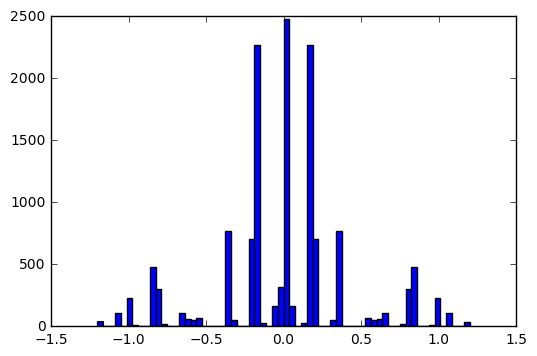

preprocessing was done


In [1]:
#
# Preprocess to create training, test, verification data
#
'''
 Read
'''

import os
from pathlib import Path
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras.preprocessing import image

lines = []
with open('./driving_log_2.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

lines = shuffle(lines[1:])

X_train = []
y_train = []
for i,line in enumerate(lines[1:]):
    for lcr_ind in range(3):
        source_path = line[lcr_ind]
        filename = source_path.split('/')[-1]
        current_path = './IMG/' + filename
        temp_image = cv2.imread(current_path)

        
        if type(temp_image) == type(None) or line[7]==0:
            pass
        else:
            if float(line[7]) == 0.0 and i%2!=0:
                pass
            else:
          
                if lcr_ind == 0:
                    temp_measurment = float(line[7])
                    X_train.append(temp_image)
                    y_train.append(temp_measurment)
                    temp_image[0] = cv2.flip(temp_image[0],1)
                    X_train.append(temp_image)
                    y_train.append(-1*temp_measurment) 
                elif lcr_ind == 1:
                    temp_measurment = float(line[7]) + 0.2
                    X_train.append(temp_image)
                    y_train.append(temp_measurment)
                    temp_image = cv2.flip(temp_image,1)
                    X_train.append(temp_image)
                    y_train.append(-1*temp_measurment) 
                elif lcr_ind == 2:
                    temp_measurment = float(line[7]) - 0.2
                    X_train.append(temp_image)
                    y_train.append(temp_measurment)
                    temp_image = cv2.flip(temp_image,1)
                    X_train.append(temp_image)
                    y_train.append(-1*temp_measurment) 
                else:pass

X_train = np.array(X_train)
y_train = np.array(y_train)

plt.hist(y_train,bins=64)
plt.show()

X_val = X_train[:int(0.2*(len(X_train)))]
y_val = y_train[:int(0.2*(len(y_train)))]
X_test = X_train[int(0.2*(len(X_train)))+1:int(0.3*(len(X_train)))]
y_test = y_train[int(0.2*(len(y_train)))+1:int(0.3*(len(X_train)))]
X_train = X_train[int(0.3*(len(X_train)))+1:]
y_train = y_train[int(0.3*(len(y_train)))+1:]

print("preprocessing was done")

In [2]:
shift_img = np.random.randint(-25,25)

new_X = []
new_y = []
for count in range(2):
    for i,x in enumerate(X_train):
        if i%1000 ==0:
            print(i,"/",len(X_train))
        else:
            pass
        rows = x.shape[0]
        cols = x.shape[1]
        shift_img = np.random.randint(-25,25)
        
        M = np.float32([[1,0,shift_img],[0,1,0]])
        x = cv2.warpAffine(x,M,(cols,rows))
        
        if shift_img==0:
            pass
        elif shift_img<0:            
            for row in range(160):
                for col in range((320-abs(shift_img)),320,1):
                    x[row,col,:] = x[row,(319-abs(shift_img)),:]
        elif shift_img>0:            
            for row in range(160):
                for col in range(0,shift_img,1):
                    x[row,col,:] = x[row,shift_img+1,:]
        else:
            pass

        new_X.append(x)
        new_y.append(y_train[i]+0.2*shift_img/(25))

0 / 9606
1000 / 9606
2000 / 9606
3000 / 9606
4000 / 9606
5000 / 9606
6000 / 9606
7000 / 9606
8000 / 9606
9000 / 9606
0 / 9606
1000 / 9606
2000 / 9606
3000 / 9606
4000 / 9606
5000 / 9606
6000 / 9606
7000 / 9606
8000 / 9606
9000 / 9606


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


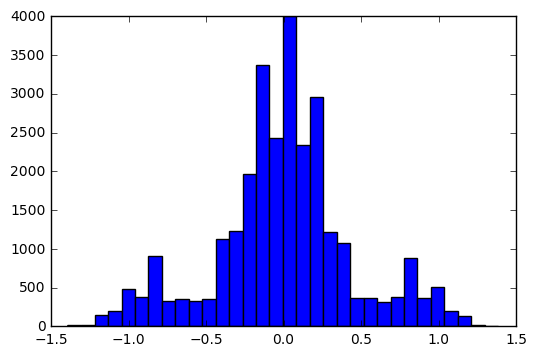

In [3]:
new_X = np.array(new_X)
new_y = np.array(new_y)

print(type(new_X))
print(type(X_train))

X_train = np.concatenate((X_train,new_X))
y_train = np.concatenate((y_train,np.array(new_y)))

plt.hist(y_train,bins=32)
plt.show()

del new_X
del new_y

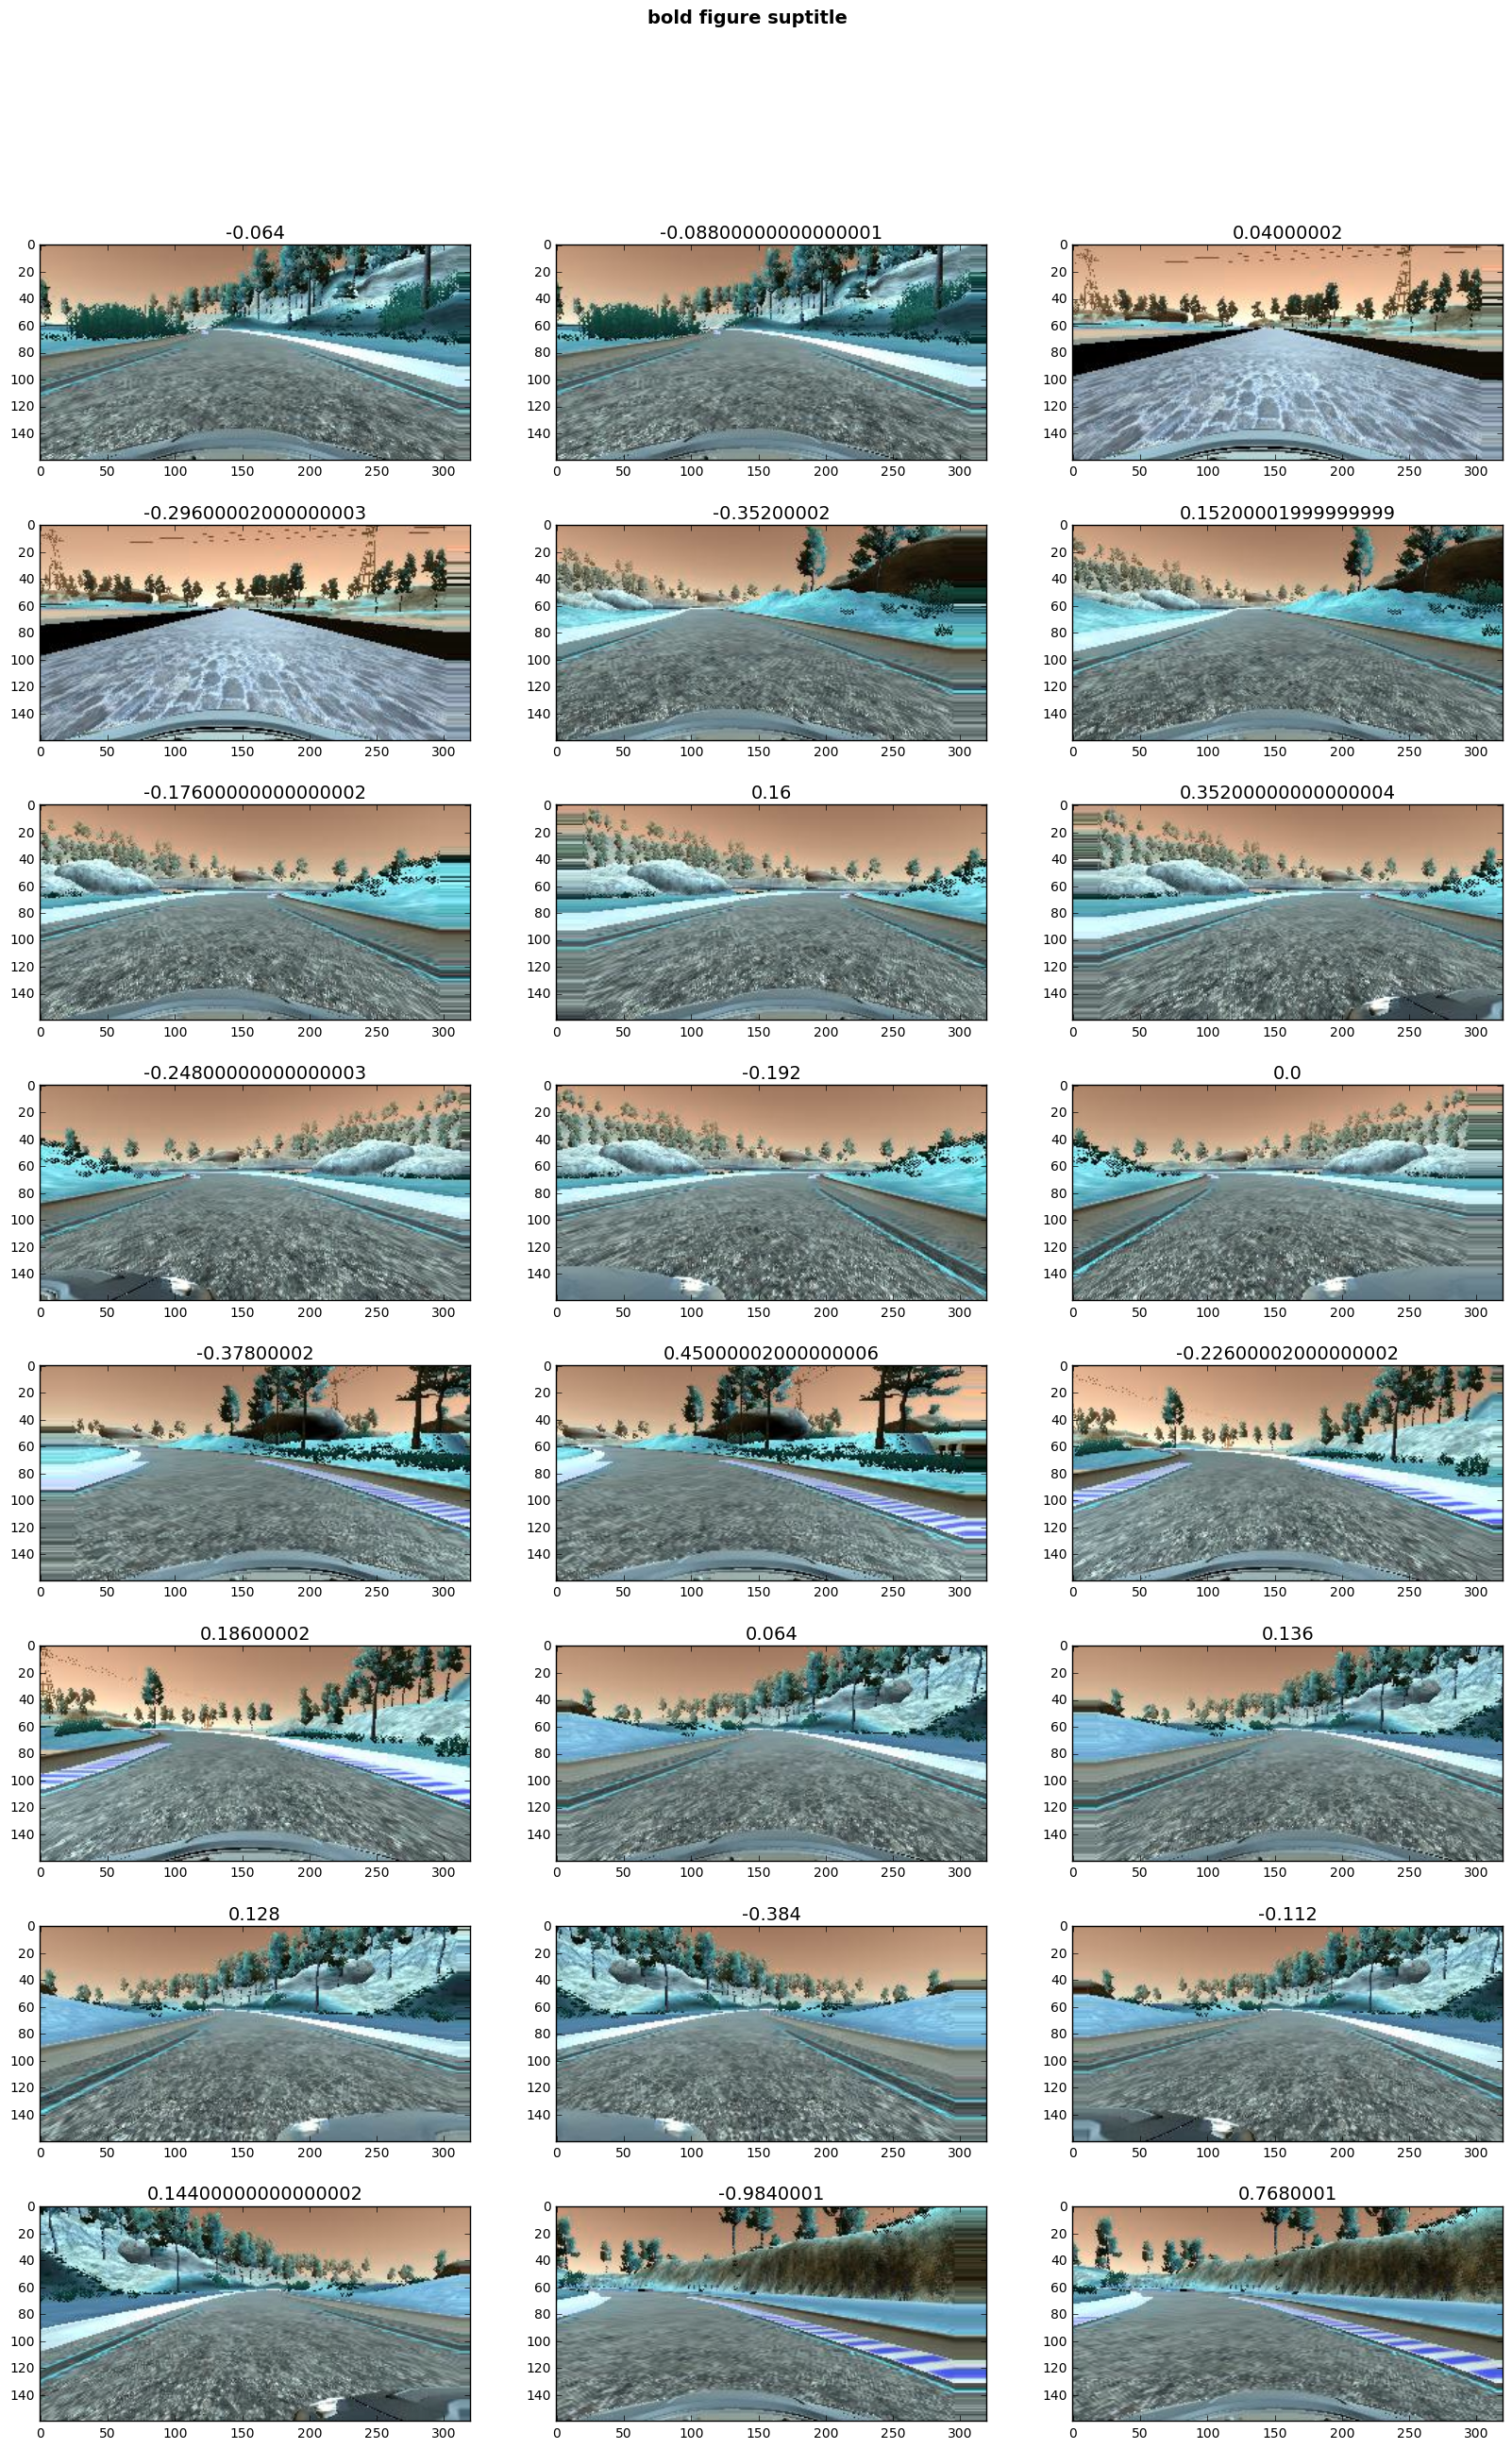

In [4]:
#
# Visualization of traing data with data argumentation
#

fig = plt.figure(figsize=(20, 30))
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

index = -550

for i in range(24):
#     temp_index = showimg(i)
    exec('ax' + str(i+1) +'= fig.add_subplot(8,3,' + str(i+1) +')') 
    exec('ax' + str(i+1) +'.imshow(X_train[' + str(i+index) + '])')
    exec('ax' + str(i+1) +'.set_title(' + str(y_train[i+index]) + ',fontsize=14)')
plt.show()

In [5]:
#
# Save image data into directories, "train", "val" and "test".
# Data will be used for generator.
#

import cv2

lines = []
for i, data in enumerate(X_train):
    file_name = "./training_data/train/" + str(i) +".jpg"
    cv2.imwrite(file_name, data)
    lines.append([file_name,y_train[i]])
with open('./train.csv','w') as csvfile:
    writer = csv.writer(csvfile, lineterminator='\n')
    writer.writerows(lines)
print(len(lines))
    
lines = []
for i, data in enumerate(X_val):
    file_name = "./training_data/val/" + str(i) +".jpg"
    cv2.imwrite(file_name, data)
    lines.append([file_name,y_val[i]])
with open('./val.csv','w') as csvfile:
    writer = csv.writer(csvfile, lineterminator='\n')
    writer.writerows(lines)
print(len(lines))

lines = []
for i, data in enumerate(X_test):
    file_name = "./training_data/test/" + str(i) +".jpg"
    cv2.imwrite(file_name, data)
    lines.append([file_name,y_test[i]])
with open('./test.csv','w') as csvfile:
    writer = csv.writer(csvfile, lineterminator='\n')
    writer.writerows(lines)
print(len(lines))
        
del X_train

28818
2744
1372


In [2]:
from sklearn.utils import shuffle
from keras.preprocessing import image
import threading
import csv
import cv2
import numpy as np

def generator_train(
    samples,
    batch_size=32,
    wrg = 0.01, # shift range of width for random_shift 
    hrg = 0.0, # shift range of height for random_shift 
    rg = 5, # Angle range for random_rotation
    ang_n_l = 0.01 # Angle noise level
):
    
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
            for batch_sample in batch_samples:
                name = batch_sample[0]
                temp_img = cv2.imread(name)
                temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
                
                #RGB color suffle
                planes = cv2.split(temp_img)
                planes = shuffle(planes)
                temp_img = cv2.merge(planes)
                
                temp_img = image.random_shift(temp_img,wrg=wrg,hrg=hrg,row_axis=0,col_axis=1,channel_axis=2)
                temp_img = image.random_rotation(temp_img,rg = rg, row_axis=0,col_axis=1,channel_axis=2)
                images.append(temp_img)
                
                temp_angle = float(batch_sample[1]) + (np.random.random()-0.5)*ang_n_l
                angles.append(temp_angle)
                
            # trim image to only see section with road
            X_train = np.array(images)
            y_train = np.array(angles)
       
            yield X_train, y_train

def generator_val(samples, batch_size=32):
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            for batch_sample in batch_samples:
                name = batch_sample[0]
                temp_img = cv2.imread(name)
                temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)
                images.append(temp_img)
                
                temp_angle = float(batch_sample[1])
                angles.append(temp_angle)
                
            X_val = np.array(images)
            y_val = np.array(angles)
       
            yield X_val, y_val

        
print('Generater creation was done')

print(type(generator_train))

lines_train = []
with open('./train.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines_train.append(line)

lines_val = []
with open('./val.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines_val.append(line)

    
gen_train = generator_train(lines_train)
gen_val = generator_val(lines_val)

Generater creation was done
<class 'function'>


In [3]:
from keras import optimizers
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Flatten, Dense, Lambda, core, Cropping2D, MaxPooling2D, Input
from keras.layers import Convolution2D, Dropout
from keras.preprocessing.image import random_shift, random_rotation, random_channel_shift
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras import backend as K
import tensorflow as tf

nb_epochs = 50
learning_rat = 0.005
batch_size = 32
drop_kp_rate = 0.6

#-----------------------------------------------------------------------------
# Model definition
#-----------------------------------------------------------------------------

inputs_model = Input(shape=(160,320,3))
x = Lambda(lambda x: x / 255.0 - 0.5, name= "Normalize")(inputs_model)
x = Cropping2D(cropping=((50, 20), (0, 0)),name="Cropping")(x)

# Data transfer is refer from https://keras.io/ja/models/model/
base_model = InceptionV3(weights='imagenet',include_top=True,input_tensor=x)
for i in range(249):
    base_model.layers.pop()
    
#Data transfer is refer from https://keras.io/ja/models/model/
for layer in base_model.layers:
    layer.trainable = False

x = Convolution2D(20,3,3, name="new_Conv_01")(base_model.layers[-1].output)
x = BatchNormalization(name="new_BN_01")(x)
x = MaxPooling2D(name='New_MP_01')(x)
x = ELU(name='New_ELU_01')(x)
x = Dropout(drop_kp_rate,name='Drop_01')(x)

x = Flatten(name='Flat_03')(x)
x = Dense(200,name='Dense_03')(x)
x = BatchNormalization(name="new_BN_03")(x)
x = ELU(name='New_ELU_03')(x)
x = Dropout(drop_kp_rate,name='Drop_03')(x)

x = Dense(100,name='Dense_04')(x)
x = BatchNormalization(name="new_BN_04")(x)
x = ELU(name='New_ELU_04')(x)
x = Dropout(drop_kp_rate,name='Drop_04')(x)

x = Dense(100,name='Dense_05')(x)
x = BatchNormalization(name="new_BN_05")(x)
x = ELU(name='New_ELU_05')(x)
x = Dropout(drop_kp_rate,name='Drop_05')(x)
out = Dense(1,use_bias=True,name='prediction')(x)

model = Model(inputs=inputs_model, outputs = out)

adam = optimizers.Adam(lr=learning_rat, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='mse', optimizer=adam)
model.summary()

model_history = model.fit_generator(
    gen_val,
    steps_per_epoch=len(lines_train) // batch_size,
    epochs=nb_epochs,
    validation_data = gen_val,
    validation_steps = 50
)

model.save('model_tf_25.h5')

/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), name="new_Conv_01")`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 320, 3)  0                                            
__________________________________________________________________________________________________
Normalize (Lambda)              (None, 160, 320, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Cropping (Cropping2D)           (None, 90, 320, 3)   0           Normalize[0][0]                  
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 44, 159, 32)  864         Cropping[0][0]                   
__________________________________________________________________________________________________
batch_norm

KeyboardInterrupt: 

In [ ]:
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.models import load_model
import matplotlib.pyplot as plt

# model = load_model('model_tf_1.h5')
predict_output_val = model.predict(X_val)

### print the keys contained in the history object
print(model_history.history.keys())

### plot the training and validation loss for each epoch
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(model_history.history['loss'])
ax1.plot(model_history.history['val_loss'])
ax1.set_title('model mean squared error loss')
ax1.set_ylabel('mean squared error loss')
ax1.set_xlabel('epoch')
ax1.legend(['training set', 'validation set'], loc='upper right')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(predict_output_val,y_val,'o')
ax2.set_title('prediction vs actual')
ax2.set_ylabel('prediction')
ax2.set_xlabel('actual')

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()